In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read in the data
disaster = pd.read_csv('data/disaster.csv')

In [10]:
# Cleaning text data
def preprocess(text):
    text = text.lower() # converting text to lower case
    text=  text.strip()  # remove leading and trailing cases
    text=  re.sub(r'<.*?>','', text) # remove html syntax
    text = re.sub(r'[^\w\s]','',text)  # remove punctuation
    text = re.sub(r'\[[0-9]*\]',' ',text) # remove reference numbers
    text = re.sub(r'\d',' ',text) # removing digits 
    text = re.sub(r'\s+', ' ', text) # collapsing multiple spaces into a single space
    return text

In [11]:
# Apply string cleaning to text variable
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [12]:
# What about stop words? (proof that Tfidf vectorizer excludes stopwords)
stop_words = ["On March 5th, I will crush my capstone presentation with my awesome team."]

vectorizer_english = TfidfVectorizer(stop_words = "english")
X_english = vectorizer_english.fit_transform(stop_words)

print("Remaining words:")
print(vectorizer_english.get_feature_names_out())

Remaining words:
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


In [13]:
# Logistic regression
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(disaster['clean_text'], disaster['target'], test_size = 0.3, random_state = 42)

In [14]:
# Vectorize words
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
# Initialize a logistic regression model and fit to vectorized training data
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

Accuracy: 0.803415061295972


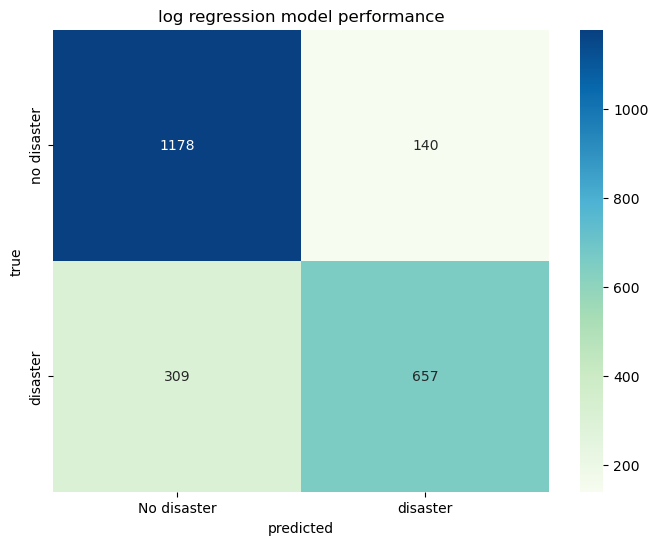

In [17]:
# Log regression results
# Calculate LR accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create confusion matrix for correctly/incorrectly predicting outcome variable
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "GnBu",
           xticklabels = ["No disaster", "disaster"],
           yticklabels = ["no disaster", "disaster"])
plt.title("log regression model performance")
plt.xlabel("predicted")
plt.ylabel('true')
plt.show()

In [19]:
# Test model with new data
new_text = [
    "Breaking: massive earthquake hits the coast",
    "i love watching disaster movies on netflix",
    "Thousands evacuated as hurricane approaches",
    "theeessse is a disaassterrrrrr",
    "it's heckin wimdy!",
    "the Palisades fire has damaged over 7,000 structures",
    "i broke my tooth on a jawbreaker"
]

# Preprocess new phrases
cleaned_new_text = [preprocess(text) for text in new_text]

# Transform using TF-IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Make predictions
predictions = lr_model.predict(new_features)

# Check outcomes
for text,pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predictions: {'Real Disaster' if pred == 1 else 'Not a real disaster'}\n")

Text: Breaking: massive earthquake hits the coast
Predictions: Real Disaster

Text: i love watching disaster movies on netflix
Predictions: Not a real disaster

Text: Thousands evacuated as hurricane approaches
Predictions: Real Disaster

Text: theeessse is a disaassterrrrrr
Predictions: Not a real disaster

Text: it's heckin wimdy!
Predictions: Not a real disaster

Text: the Palisades fire has damaged over 7,000 structures
Predictions: Not a real disaster

Text: i broke my tooth on a jawbreaker
Predictions: Not a real disaster

